### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd 
import numpy as np 

In [4]:
data = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t')
drugs = pd.DataFrame(data)

In [5]:
drugs 

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [8]:
drugs2 = drugs[['rating', 'effectiveness', 'sideEffects']]
drugs2 

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
...,...,...,...
3102,10,Highly Effective,Mild Side Effects
3103,1,Ineffective,Extremely Severe Side Effects
3104,2,Marginally Effective,Moderate Side Effects
3105,8,Considerably Effective,Mild Side Effects


<function matplotlib.pyplot.show(close=None, block=None)>

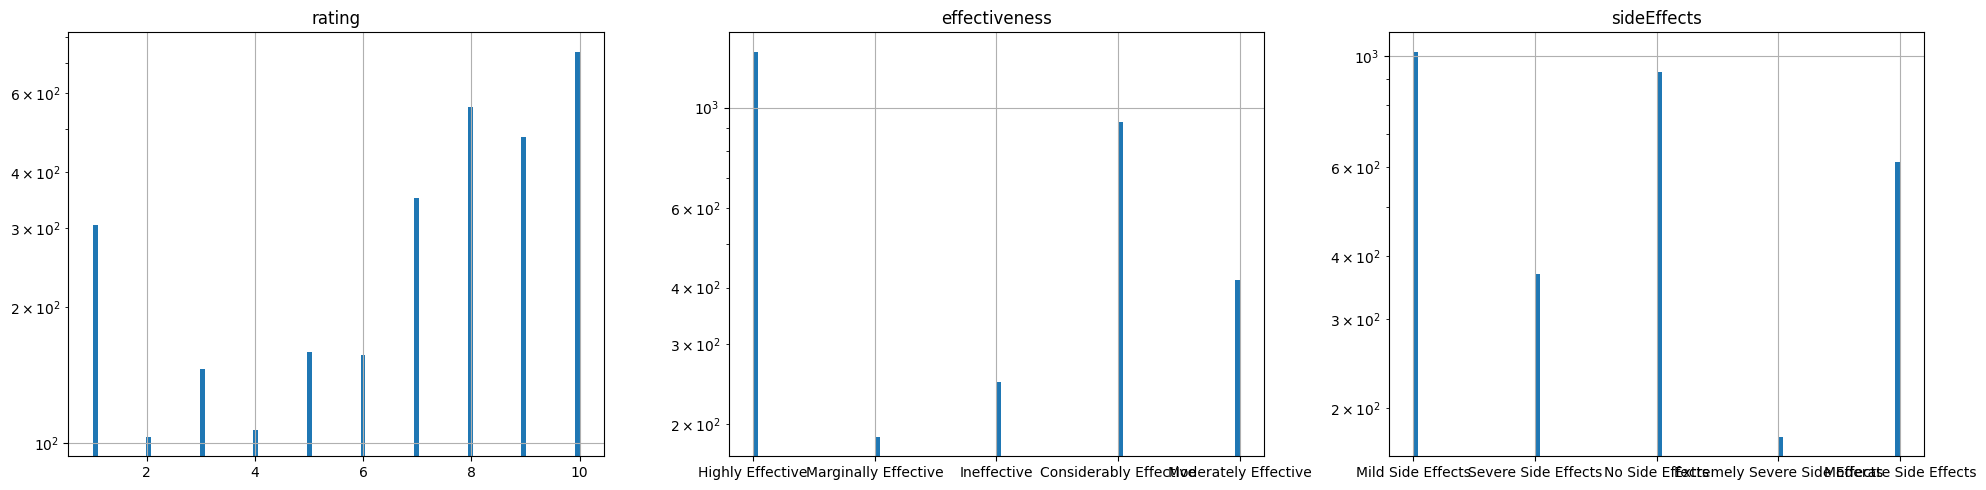

In [10]:
import matplotlib.pyplot as plt
#we can see in all variables except for years and stars that the frequency of 0 es huge
figure = plt.figure(figsize=(20,5))

for n, c in enumerate(drugs2.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  drugs2[c].hist(ax=ax, bins=100)

figure.tight_layout() #this feature separate the graphs correctly
plt.show

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [15]:
drogas = pd.get_dummies(drugs2['effectiveness'])
drugs2[['Highly Effective', 'Marginally Effective', 'Ineffective', 'Considerably Effective', 'Moderately Effective']] = drogas[['Highly Effective', 'Marginally Effective', 'Ineffective', 'Considerably Effective', 'Moderately Effective']]


c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
drogas2 = pd.get_dummies(drugs2['sideEffects'])
drugs2[['Mild Side Effects', 'Severe Side Effects', 'No Side Effects', 'Extremely Severe Side Effects', 'Moderate Side Effects']] = drogas2[['Mild Side Effects', 'Severe Side Effects', 'No Side Effects', 'Extremely Severe Side Effects', 'Moderate Side Effects']]
drugs2

,rating,effectiveness,sideEffects,Highly Effective,Marginally Effective,Ineffective,Considerably Effective,Moderately Effective,Mild Side Effects,Severe Side Effects,No Side Effects,Extremely Severe Side Effects,Moderate Side Effects
0,4,Highly Effective,Mild Side Effects,1,0,0,0,0,1,0,0,0,0
1,1,Highly Effective,Severe Side Effects,1,0,0,0,0,0,1,0,0,0
2,10,Highly Effective,No Side Effects,1,0,0,0,0,0,0,1,0,0
3,3,Marginally Effective,Mild Side Effects,0,1,0,0,0,1,0,0,0,0
4,2,Marginally Effective,Severe Side Effects,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,10,Highly Effective,Mild Side Effects,1,0,0,0,0,1,0,0,0,0
3103,1,Ineffective,Extremely Severe Side Effects,0,0,1,0,0,0,0,0,1,0
3104,2,Marginally Effective,Moderate Side Effects,0,1,0,0,0,0,0,0,0,1
3105,8,Considerably Effective,Mild Side Effects,0,0,0,1,0,1,0,0,0,0


In [23]:
drugs2= drugs2.drop(['effectiveness', 'sideEffects'], axis=1)
drugs2

,rating,Highly Effective,Marginally Effective,Ineffective,Considerably Effective,Moderately Effective,Mild Side Effects,Severe Side Effects,No Side Effects,Extremely Severe Side Effects,Moderate Side Effects
0,4,1,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,0
2,10,1,0,0,0,0,0,0,1,0,0
3,3,0,1,0,0,0,1,0,0,0,0
4,2,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,1,0,0,0,0,1,0,0,0,0
3103,1,0,0,1,0,0,0,0,0,1,0
3104,2,0,1,0,0,0,0,0,0,0,1
3105,8,0,0,0,1,0,1,0,0,0,0


In [28]:
drugs2.columns

Index(['rating', 'Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective', 'Mild Side Effects',
       'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype='object')

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
prueba = silhouette_score(drugs2, )

In [34]:

X = drugs2[['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective', 'Mild Side Effects',
       'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects']]
y = drugs2 [['rating']]


km = KMeans(n_clusters=15, random_state=42)


km.fit_predict(X)


score = silhouette_score(X, km.labels_, metric='euclidean')


print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.946


#### Genera el K Means 

#### Muestra en un grafico de quesito la distribución de los distintos clusters